In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度.xls',encoding='utf-16')
df.head(10)

,credLimit,credLimit_group,ConTain,seg
0,6070000,NaN,[職業]:科技\n[年資]:2年\n[年收]:寫2M\n[財力]:所得清單/帳戶/基金/保單...,職業 科技 年資 2 年 年收 寫 2M 財力 所得 清單 帳戶 基金 保單 原持 ...
1,4500000,NaN,[心得] 華南 享利樂活Combo Combo Life 加辦核卡時間Wed Apr 25 ...,心得 華南 享利樂活 Combo Combo Life 加辦 核卡 時間...
2,2410000,NaN,[心得] 元大鑽金J與M - 未核時間Tue Jan 16 15:02:22 2018\n[...,心得 元大鑽金 J 與 M 未核 時間 Tue Jan 16 15 ...
3,2000000,NaN,[心得] 機場接送(範圍)貴賓室、哩程紅利現金回饋時間Sat Nov 3 23:19:34...,心得 機場 接送 範圍 貴賓室 、 哩程 紅利 現金回饋 時間 Sat Nov ...
4,1500000,NaN,[心得] 中信.玉山.台新.花旗.富邦.國泰多家調額時間Sun Sep 1 19:18:2...,心得 中信 玉山 台新 花旗 富邦 國泰 多家 調額 時間 Sun Sep ...
5,1500000,NaN,[心得] 土銀.合庫核卡 /台新未核/ 兩家調額時間Fri May 17 22:32:21 ...,心得 土銀 合庫 核卡 台新 未核 兩家 調額 時間 Fri May 1...
6,1343000,NaN,[心得] 星展飛行鈦金卡核卡時間Thu Jul 26 19:11:49 2018\n[申辦]...,心得 星展 飛行鈦金卡 核卡 時間 Thu Jul 26 19 11 49 ...
7,1200000,NaN,[心得] 元大永久調額成功 & 請益時間Tue Mar 12 20:06:19 2019\n...,心得 元大 永久 調額 成功 請益 時間 Tue Mar 12 20...
8,1100000,NaN,[心得] 國泰長榮極致無限卡 新戶核卡時間Fri Jan 25 00:06:36 2019\...,心得 國泰 長榮 極致 無限卡 新戶 核卡 時間 Fri Jan 25 ...
9,1000000,NaN,[心得] AE大白核卡時間Thu Dec 7 17:10:55 2017\n[職業]:工程...,心得 AE 大白 核卡 時間 Thu Dec 7 17 10 55 ...


# 若要分群,有2個考量點:
   ## １.分界點必須選在稀疏區(明顯斷層,否則會模稜兩可)
   ##  2.每個區段樣本數不能過少或是數量差異過大
# 分群採用:
# 2W(含)W~4.5W(含)#因為學生很容易斷出來
# 4.5W~9.5W(含)
# 9.5W到19.5W(含)
# 19.5W以上到29.5W(含)
# 29.5W以上
# 一共五類
# 不一定要這樣分,根據經驗僅供參考

In [6]:
df_group=df
df_group.loc[(df_group['credLimit'] >= 10) & (df_group['credLimit'] <=45000),'credLimit_group']=0
df_group.loc[(df_group['credLimit'] > 45000) & (df_group['credLimit'] <=95000),'credLimit_group']=1
df_group.loc[(df_group['credLimit'] > 95000) & (df_group['credLimit'] <=195000),'credLimit_group']=2
df_group.loc[(df_group['credLimit'] > 195000) & (df_group['credLimit'] <=295000),'credLimit_group']=3
df_group.loc[(df_group['credLimit'] > 295000) ,'credLimit_group']=4

Text(0, 0.5, 'sequence')

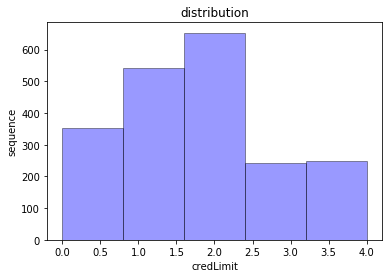

In [9]:
#在檢視一次樣本,各個級數數量並無差太多,應該可以?
sns.distplot(df_group['credLimit_group'], hist=True, kde=False, 
             bins=int(5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

In [11]:
df_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度.xls")